In [1]:
# Job Posting Data Web Scraping           

In [37]:
import pandas as pd
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.graph_objects as go
from wordcloud import WordCloud
%matplotlib inline

In [38]:
df=pd.read_csv('link_by_areas.csv')
df.head()

,type,link
0,Accounting Jobs,https://www.naukri.com/accounting-jobs?xt=cats...
1,Interior Design Jobs,https://www.naukri.com/interior-design-jobs?xt...
2,Bank Jobs,https://www.naukri.com/bank-jobs?xt=catsrch&qf...
3,Content Writing Jobs,https://www.naukri.com/content-writing-jobs?xt...
4,Consultant Jobs,https://www.naukri.com/consultant-jobs?xt=cats...


In [39]:
def my_url(page_no,url):
    url='https://www.naukri.com/'+url[0][23:url[0].index('?')]+'-{}'.format(page_no)+'?'+url[0].split('?')[1]
    return str(url)
    

In [40]:
def extract_info(obj):
    job_title=obj.find('a',"title ellipsis").text
    company=obj.find('a',"subTitle ellipsis fleft").text
    try:
        try:
            rating=float(obj.find('span',"starRating fleft").text)
        except AttributeError:
            rating=0
        try:
            review_counts=int(obj.find('span','reviewsCount fleft').text.split()[0])
        except AttributeError:
            review_counts=0
        try:
            exp=obj.find('span',"ellipsis fleft expwdth").text
        except AttributeError:
            exp='0-0 Yrs'
        try:
            salary=obj.find('span',"ellipsis fleft").text
        except AttributeError:
            salary='Not disclosed'
        try:
            location=obj.find('span',"ellipsis fleft locWdth").text
        except AttributeError:
            location='Not Mentioned'
        try:
            job_desc=obj.find('div',"ellipsis job-description").text
        except AttributeError:
            job_desc='Not Mentioned'
        try:
            tag=obj.find('ul',"tags has-description")
            key=[]
            for i in tag.find_all('li',class_="fleft dot"):
                key.append(i.getText())
            tags=','.join(key)
        except AttributeError:
            tags='No tags'
        try:
            job_posted=obj.find('span','fleft postedDate').text
        except:
            job_posted='Not Mentioned'
        results=[job_posted,job_title,company,exp,salary,location,rating,review_counts,job_desc,tags]
        return results
    except:
        return 'Error Occurring...'
    
    

In [41]:
def main(no_of_pages,job_type):
    driver=webdriver.Chrome()
    records=[]
    job_type=df[df['type']==job_type]['link'].values
    for j in range(1,no_of_pages+1):
        url=my_url(j,job_type)
        driver.get(url)
        time.sleep(5)
        soup=BeautifulSoup(driver.page_source,'html.parser')
        data=soup.find_all('article',{'class':'jobTuple'})
        for i in data:
            record=extract_info(i)
            if record:
                records.append(record)
    return records
            

<h1>-----------------------------------Personal Job Portal----------------------------------------------<h1>

In [42]:
n=int(input('Enter the number of pages you need to scrap:'))

Enter the number of pages you need to scrap:15


| Serial No. | Job Type |
|---|---|
| 1 | Accounting Jobs |
| 2 | Interior Design Jobs |
| 3 | Bank Jobs |
| 4 | Content Writing Jobs |
| 5 | Consultant Jobs |
| 6 | Engineering Jobs |
| 7 | Export Import Jobs |
| 8 | Merchandiser Jobs |
| 9 | Security Jobs |
| 10 | HR Jobs |
| 11 | Hotel Jobs |
| 12 | Application Programming Jobs |
| 13 | Client Server Jobs |
| 14 | DBA Jobs |
| 15 | Ecommerce Jobs |
| 16 | ERP Jobs |
| 17 | VLSI Jobs |
| 18 | Mainframe Jobs |
| 19 | Middleware Jobs |
| 20 | Mobile Jobs |
| 21 | Network Administrator Jobs |
| 22 | IT Jobs |
| 23 | Testing Jobs |
| 24 | System Programming Jobs |
| 25 | EDP Jobs |
| 26 | Telecom Software Jobs |
| 27 | Telecom Jobs |
| 28 | BPO Jobs |
| 29 | Legal Jobs |
| 30 | Marketing Jobs |
| 31 | Packaging Jobs |
| 32 | Pharma Jobs |
| 33 | Maintenance Jobs |
| 34 | Logistics Jobs |
| 35 | Sales Jobs |
| 36 | Secretary Jobs |
| 37 | Corporate Planning Jobs |
| 38 | Site Engineering Jobs |
| 39 | Film Jobs |
| 40 | Teacher Jobs |
| 41 | Airline Jobs |
| 42 | Graphic Designer Jobs |
| 43 | Shipping Jobs |
| 44 | Analytics Jobs |
| 45 | Business Intelligence Jobs |
| 46 | Data Science Jobs |


In [43]:
job_type=input('Enter the job type based on the above job titles:')

Enter the job type based on the above job titles:Data Science Jobs


In [44]:
result=main(n,job_type.title())
job_portal=pd.DataFrame(result,columns=['Job_Posted_On','Job_Title','Company','Experience','Salary','Location','Ratings','Review_Counts','Job_Description','Job_Tags'])

In [45]:
job_portal.head()

,Job_Posted_On,Job_Title,Company,Experience,Salary,Location,Ratings,Review_Counts,Job_Description,Job_Tags
0,2 Days Ago,Data Science Analytics Sr Analyst - Data Science,Accenture,5-8 Yrs,Not disclosed,Mumbai,4.1,39630,Please note that this role may require you to...,"Data Science,Publishing,Artificial Intelligenc..."
1,1 Day Ago,Senior Analyst - Data Science (Regression),Tiger Analytics,2-4 Yrs,Not disclosed,"Hyderabad/Secunderabad, Chennai, Bangalore/Ben...",3.5,339,A passion for writing high-quality code (Pyth...,"customer analytics,Marketing analytics,data sc..."
2,1 Day Ago,Manager-Data Science,AMERICAN EXPRESS,2-6 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",4.3,2408,. Functional: . Hands-on experience with the ...,"Career development,Automation,data science,Fin..."
3,30+ Days Ago,Senior Analyst - Data Science,Tiger Analytics,0-4 Yrs,Not disclosed,Chennai,3.5,339,A passion for writing high-quality code (Pyth...,"data science,Process documentation,Senior Anal..."
4,10 Days Ago,Data Science - Route Optimization - Senior Ass...,PwC,6-7 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",3.6,5764,"Solid knowledge and experience of supervised,...","data cleansing,Cluster analysis,Data analysis,..."


In [46]:
job_portal

,Job_Posted_On,Job_Title,Company,Experience,Salary,Location,Ratings,Review_Counts,Job_Description,Job_Tags
0,2 Days Ago,Data Science Analytics Sr Analyst - Data Science,Accenture,5-8 Yrs,Not disclosed,Mumbai,4.1,39630,Please note that this role may require you to...,"Data Science,Publishing,Artificial Intelligenc..."
1,1 Day Ago,Senior Analyst - Data Science (Regression),Tiger Analytics,2-4 Yrs,Not disclosed,"Hyderabad/Secunderabad, Chennai, Bangalore/Ben...",3.5,339,A passion for writing high-quality code (Pyth...,"customer analytics,Marketing analytics,data sc..."
2,1 Day Ago,Manager-Data Science,AMERICAN EXPRESS,2-6 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",4.3,2408,. Functional: . Hands-on experience with the ...,"Career development,Automation,data science,Fin..."
3,30+ Days Ago,Senior Analyst - Data Science,Tiger Analytics,0-4 Yrs,Not disclosed,Chennai,3.5,339,A passion for writing high-quality code (Pyth...,"data science,Process documentation,Senior Anal..."
4,10 Days Ago,Data Science - Route Optimization - Senior Ass...,PwC,6-7 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",3.6,5764,"Solid knowledge and experience of supervised,...","data cleansing,Cluster analysis,Data analysis,..."
...,...,...,...,...,...,...,...,...,...,...
295,18 Days Ago,Data Analyst,Arbeit Associates,3-7 Yrs,10-16 Lacs PA,"Hybrid - Gurgaon/ Gurugram, Haryana, Bangalore...",0.0,0,Minimum 3-7 years of experience working close...,"SQL,Python,Data Science,R,Google Analytics,Pow..."
296,30+ Days Ago,Data Analyst,Talent Zone Consultant,10-12 Yrs,Not disclosed,Bangalore/Bengaluru,4.4,2,graduate degree in Data Science or other quan...,"Data Science,Business Intelligence,R,Data Scie..."
297,30+ Days Ago,Data Analyst,Xpheno,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,3.3,100,Bachelor s degree with 5+ years of experience...,"Automation,data science,Life sciences,Data ana..."
298,2 Days Ago,Data Scientist | Machine Learning Engineer | D...,Quiksync Technologies Llp,8-13 Yrs,25-40 Lacs PA,Remote,2.9,23,"Skills Required : . Machine Learning, Deep Le...","machine learning,Deep Learning,data science,Az..."


In [47]:
job_portal.dtypes

Job_Posted_On       object
Job_Title           object
Company             object
Experience          object
Salary              object
Location            object
Ratings            float64
Review_Counts        int64
Job_Description     object
Job_Tags            object
dtype: object

In [48]:
job_portal.index+=1

In [49]:
job_portal.isnull().sum()

Job_Posted_On      0
Job_Title          0
Company            0
Experience         0
Salary             0
Location           0
Ratings            0
Review_Counts      0
Job_Description    0
Job_Tags           0
dtype: int64

In [50]:
job_portal['Experience']=job_portal['Experience'].str.split('-').apply(lambda x:[int(i) if len(i.split())==1 else (int(i.split()[0]) if i.split()[0].isdigit() else i) for i in x]+['Yrs'])

In [51]:
job_portal.head()

,Job_Posted_On,Job_Title,Company,Experience,Salary,Location,Ratings,Review_Counts,Job_Description,Job_Tags
1,2 Days Ago,Data Science Analytics Sr Analyst - Data Science,Accenture,"[5, 8, Yrs]",Not disclosed,Mumbai,4.1,39630,Please note that this role may require you to...,"Data Science,Publishing,Artificial Intelligenc..."
2,1 Day Ago,Senior Analyst - Data Science (Regression),Tiger Analytics,"[2, 4, Yrs]",Not disclosed,"Hyderabad/Secunderabad, Chennai, Bangalore/Ben...",3.5,339,A passion for writing high-quality code (Pyth...,"customer analytics,Marketing analytics,data sc..."
3,1 Day Ago,Manager-Data Science,AMERICAN EXPRESS,"[2, 6, Yrs]",Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",4.3,2408,. Functional: . Hands-on experience with the ...,"Career development,Automation,data science,Fin..."
4,30+ Days Ago,Senior Analyst - Data Science,Tiger Analytics,"[0, 4, Yrs]",Not disclosed,Chennai,3.5,339,A passion for writing high-quality code (Pyth...,"data science,Process documentation,Senior Anal..."
5,10 Days Ago,Data Science - Route Optimization - Senior Ass...,PwC,"[6, 7, Yrs]",Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",3.6,5764,"Solid knowledge and experience of supervised,...","data cleansing,Cluster analysis,Data analysis,..."


In [52]:
All_tags=','.join(job_portal['Job_Tags'].tolist())

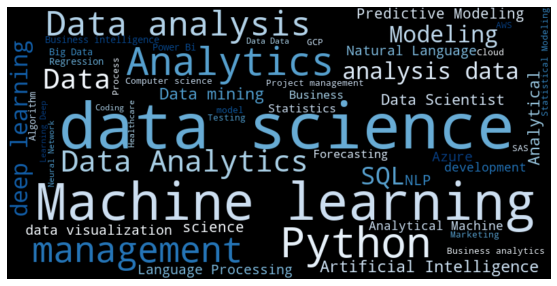

In [53]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=50,
    colormap='Blues',
    contour_color='steelblue'
).generate(All_tags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
data = list(job_portal['Company'].value_counts().items())
companies = [item[0] for item in data]
frequencies = [item[1] for item in data]

background_color = 'rgb(40, 40, 40)'
fig = go.Figure(data=[go.Bar(x=companies, y=frequencies, marker=dict(color='#f64a69'))])

fig.update_layout(
    title="Companies in {} Postings and their Frequency".format(job_type.title()),
    xaxis=dict(
        title="Company",
        title_font=dict(color='#f64a69'),
        tickangle=-45,
        automargin=True,
        tickfont=dict(size=10, color='white'),  # Change tick labels color to white
    ),
    yaxis=dict(title="Frequency", tickfont=dict(size=10, color='white'), title_font=dict(color='#f64a69')),
    height=600,  # Reduce the height to make space for labels
    width=1000,
    plot_bgcolor=background_color,
    paper_bgcolor=background_color,
    title_font=dict(color='#f64a69')
)

# Adjust the bar width to reduce the gap between bars
fig.update_traces(marker=dict(line=dict(width=0.5)), selector=dict(type='bar'))

fig.show()

In [55]:
location_list = np.array([i.strip() for i in ','.join(job_portal['Location'].tolist()).split(',')])
locat_freq = dict()
for i in location_list:
    locat_freq[i] = locat_freq.get(i, 0) + 1

locations = [item[0] for item in locat_freq.items()]
frequencies = [item[1] for item in locat_freq.items()]

background_color = 'rgb(70, 70, 100)'
fig = go.Figure(data=[go.Bar(x=locations, y=frequencies, marker=dict(color='rgb(255, 105, 180)'))])

fig.update_layout(
    title="Locations of {} Postings and their Frequency".format(job_type.title()),
    xaxis=dict(
        title="Locations",
        title_font=dict(color='rgb(255, 105, 180)'),
        tickangle=-45,
        automargin=True,
        tickfont=dict(size=10, color='white'),  # Change tick labels color to white
    ),
    yaxis=dict(title="Frequency", tickfont=dict(size=10, color='white'), title_font=dict(color='rgb(255, 105, 180)')),
    height=500,
    width=1000,
    plot_bgcolor=background_color,
    paper_bgcolor=background_color,
    title_font=dict(color='rgb(255, 105, 180)')
)

# Adjust the bar width to reduce the gap between bars
fig.update_traces(marker=dict(line=dict(width=0.5)), selector=dict(type='bar'))

fig.show()

In [56]:
job_portal['Persons_Can_Apply'] = job_portal.apply(lambda x: 'Fresher' if (x['Experience'][0] == 0 and x['Experience'][1] <= 2) else ('Intermediate' if (x['Experience'][0] > 2 and x['Experience'][1] <= 5) else ('Senior' if (x['Experience'][0] > 5) else ('Fresher Intermediate Senior' if (x['Experience'][0] == 0 and x['Experience'][1] > 5) else('Fresher Intermediate' if(x['Experience'][0] == 0 and x['Experience'][1] <= 5) else ('Intermediate Senior' if (x['Experience'][0] > 2 and x['Experience'][1] > 5) else 'Senior'))))), axis=1)


In [57]:
job_portal[['Persons_Can_Apply']].value_counts()

Persons_Can_Apply   
Senior                  165
Intermediate Senior      91
Intermediate             23
Fresher                  14
Fresher Intermediate      7
Name: count, dtype: int64

In [58]:
emp_can_apply=list(job_portal[['Persons_Can_Apply']].value_counts().items())
levels=[item[0][0] for item in emp_can_apply]
levels_freq=[item[1] for item in emp_can_apply]
levels_freq

[165, 91, 23, 14, 7]

In [59]:
background_color = 'rgb(70, 70, 100)'
fig = go.Figure(data=[go.Bar(x=levels, y=levels_freq, marker=dict(color='rgb(255, 105, 100)'))])
fig.update_layout(
    title="Various levels of people who can apply based on Experience and their frequency of each level.",
    xaxis=dict(
        title="Locations",
        title_font=dict(color='rgb(255, 105, 100)', size=18),  # Increase font size to 18
        tickangle=-45,
        automargin=True,
        tickfont=dict(size=14, color='white'),  # Increase font size to 14 and change color to white
    ),
    yaxis=dict(title="Frequency", tickfont=dict(size=14, color='white'), title_font=dict(color='rgb(255, 105, 100)', size=18)),  # Increase font size to 18
    height=600,
    width=1000,
    plot_bgcolor=background_color,
    paper_bgcolor=background_color,
    title_font=dict(color='rgb(255, 105, 100)',size=20),  # Increase font size to 24
)
fig.show()

<h3> To Stay Updated With Current Job Postings!!! <h3>

In [60]:
job_portal[(job_portal['Job_Posted_On']=='Few Hours Ago') | (job_portal['Job_Posted_On']=='1 Day Ago')]

,Job_Posted_On,Job_Title,Company,Experience,Salary,Location,Ratings,Review_Counts,Job_Description,Job_Tags,Persons_Can_Apply
2,1 Day Ago,Senior Analyst - Data Science (Regression),Tiger Analytics,"[2, 4, Yrs]",Not disclosed,"Hyderabad/Secunderabad, Chennai, Bangalore/Ben...",3.5,339,A passion for writing high-quality code (Pyth...,"customer analytics,Marketing analytics,data sc...",Senior
3,1 Day Ago,Manager-Data Science,AMERICAN EXPRESS,"[2, 6, Yrs]",Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",4.3,2408,. Functional: . Hands-on experience with the ...,"Career development,Automation,data science,Fin...",Senior
12,1 Day Ago,Sr. Data Science (machine learning) Developer,AugustCode Solutions Pvt. Ltd.,"[3, 5, Yrs]",5-9 Lacs PA,Remote,0.0,0,Role & Responsibilities > Data Analysis and P...,"Data Science,Machine Learning,Deep Learning,Ar...",Intermediate
18,1 Day Ago,Manager - Data Science ( Retail ),Loyalytics Consulting,"[5, 10, Yrs]",Not disclosed,Bangalore/Bengaluru,3.8,6,Requirements . Bachelors or Masters in a quan...,"IT services,Health insurance,Data analysis,Dat...",Intermediate Senior
24,1 Day Ago,Data Science Engineer 1,Emerson,"[2, 3, Yrs]",Not disclosed,Pune,4.1,334,Basic understanding of machine learning algor...,"Web technologies,data science,Neural networks,...",Senior
25,1 Day Ago,Data Science Engineer 1,Copeland,"[2, 3, Yrs]",Not disclosed,Pune,4.0,208,Basic understanding of machine learning algor...,"Web technologies,data science,Neural networks,...",Senior
31,1 Day Ago,Data Science Manager,Rintelo Consulting,"[8, 13, Yrs]",Not disclosed,"Noida, Uttar Pradesh, Gurgaon/ Gurugram, Haryana",0.0,0,To conduct testing of the designed product an...,"Data Science,data analysis,Testing Tools,data ...",Senior
44,1 Day Ago,Lead - Data Science,V Mart,"[6, 9, Yrs]",Not disclosed,Delhi / NCR,4.2,1507,• Execute analytical experiments methodically...,"R,Data Scientist,Python,Predictive Modeling,Ha...",Senior
198,1 Day Ago,Data Scientist,Globals Ites,"[5, 8, Yrs]",Not disclosed,"Bangalore/ Bengaluru, Karnataka",4.2,7,https://www.globalsinc.com/careers/explore-jo...,"Data Science,Data Pipeline,Python,SQL,R,SAS,Da...",Intermediate Senior
206,1 Day Ago,Data Scientist,4S Advisory,"[4, 8, Yrs]",Not disclosed,"Chennai, Bangalore/Bengaluru",0.0,0,Experience in risk and credit score domains p...,"Data Science,Recommender Systems,python,Logist...",Intermediate Senior
